# Medical Cost Personal Insurance Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,ElasticNetCV,RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pickle

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
data = pd.read_csv(r"H:\Study\Python\medical_cost_insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Separate Categorical and Numerical Features

In [8]:
cat_columns = [col for col in data.columns if data[col].dtype == "O"]
cat_columns

['sex', 'smoker', 'region']

In [9]:
data[cat_columns].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [10]:
categorical = data[cat_columns]
categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


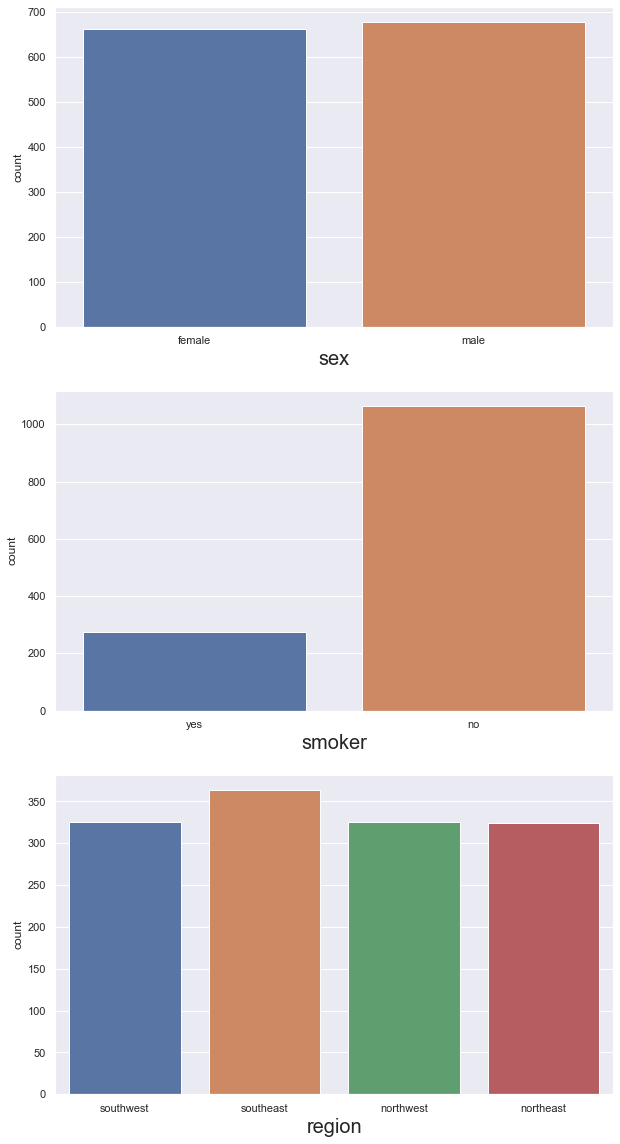

In [11]:
plt.figure(figsize=(10,20))
plotnumber=1

for column in categorical:
    if plotnumber <=4:
        ax = plt.subplot(3,1,plotnumber)
        sns.countplot(categorical[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

#### Encoding the categorical features

In [12]:
categorical.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [13]:
categorical.replace({"sex":{"male":0,"female":1}},inplace=True)

In [14]:
categorical.replace({"smoker":{"yes":0,"no":1}},inplace=True)

In [15]:
categorical["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
categorical.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [18]:
categorical.head()

,sex,smoker,region
0,1,0,1
1,0,1,0
2,0,1,0
3,0,1,3
4,0,1,3


In [19]:
Num_col = [col for col in data.columns if data[col].dtype != "O"]
Num_col

['age', 'bmi', 'children', 'charges']

In [20]:
data[Num_col].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [21]:
data[Num_col].shape

(1338, 4)

In [22]:
Numerical = data[Num_col]
Numerical.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


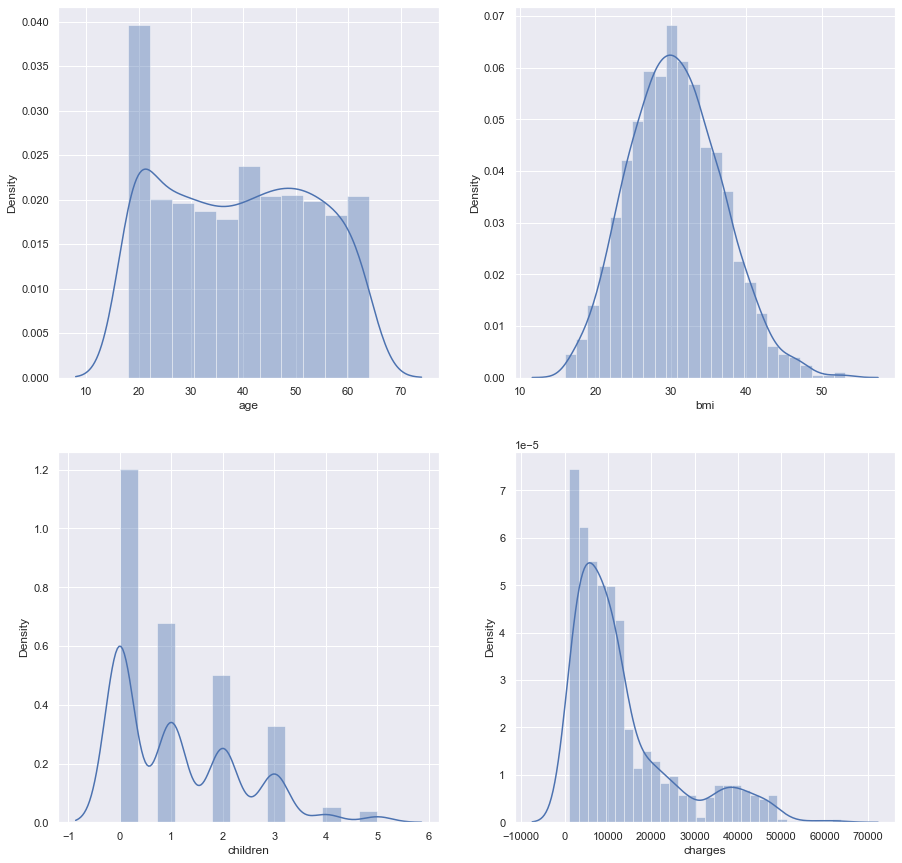

In [23]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in Numerical:
    if plotnumber <=5:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(Numerical[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Density'>

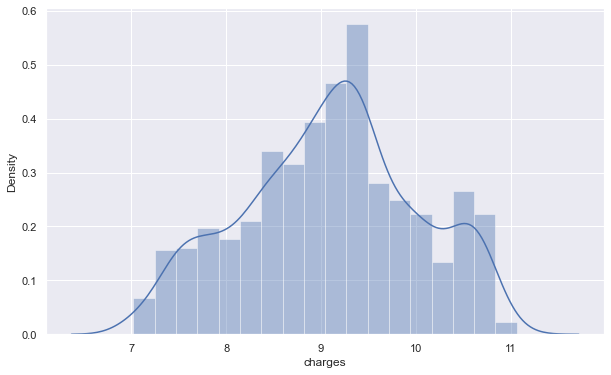

In [24]:
plt.figure(figsize=(10,6))
Numerical['charges'] = np.log(Numerical['charges'])
sns.distplot(Numerical["charges"])

#### Concatenate Categorical and Numerical

In [25]:
data = pd.concat([categorical, Numerical], axis=1)
data.head()

,sex,smoker,region,age,bmi,children,charges
0,1,0,1,19,27.900,0,9.734176
1,0,1,0,18,33.770,1,7.453302
2,0,1,0,28,33.000,3,8.400538
3,0,1,3,33,22.705,0,9.998092
4,0,1,3,32,28.880,0,8.260197


In [26]:
data.shape

(1338, 7)

In [27]:
data.describe()

,sex,smoker,region,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.494768,0.795217,1.455904,39.207025,30.663397,1.094918,9.098659
std,0.500160,0.403694,1.130888,14.049960,6.098187,1.205493,0.919527
min,0.000000,0.000000,0.000000,18.000000,15.960000,0.000000,7.022756
25%,0.000000,1.000000,0.000000,27.000000,26.296250,0.000000,8.463853
50%,0.000000,1.000000,1.000000,39.000000,30.400000,1.000000,9.146552
75%,1.000000,1.000000,2.000000,51.000000,34.693750,2.000000,9.719558
max,1.000000,1.000000,3.000000,64.000000,53.130000,5.000000,11.063045


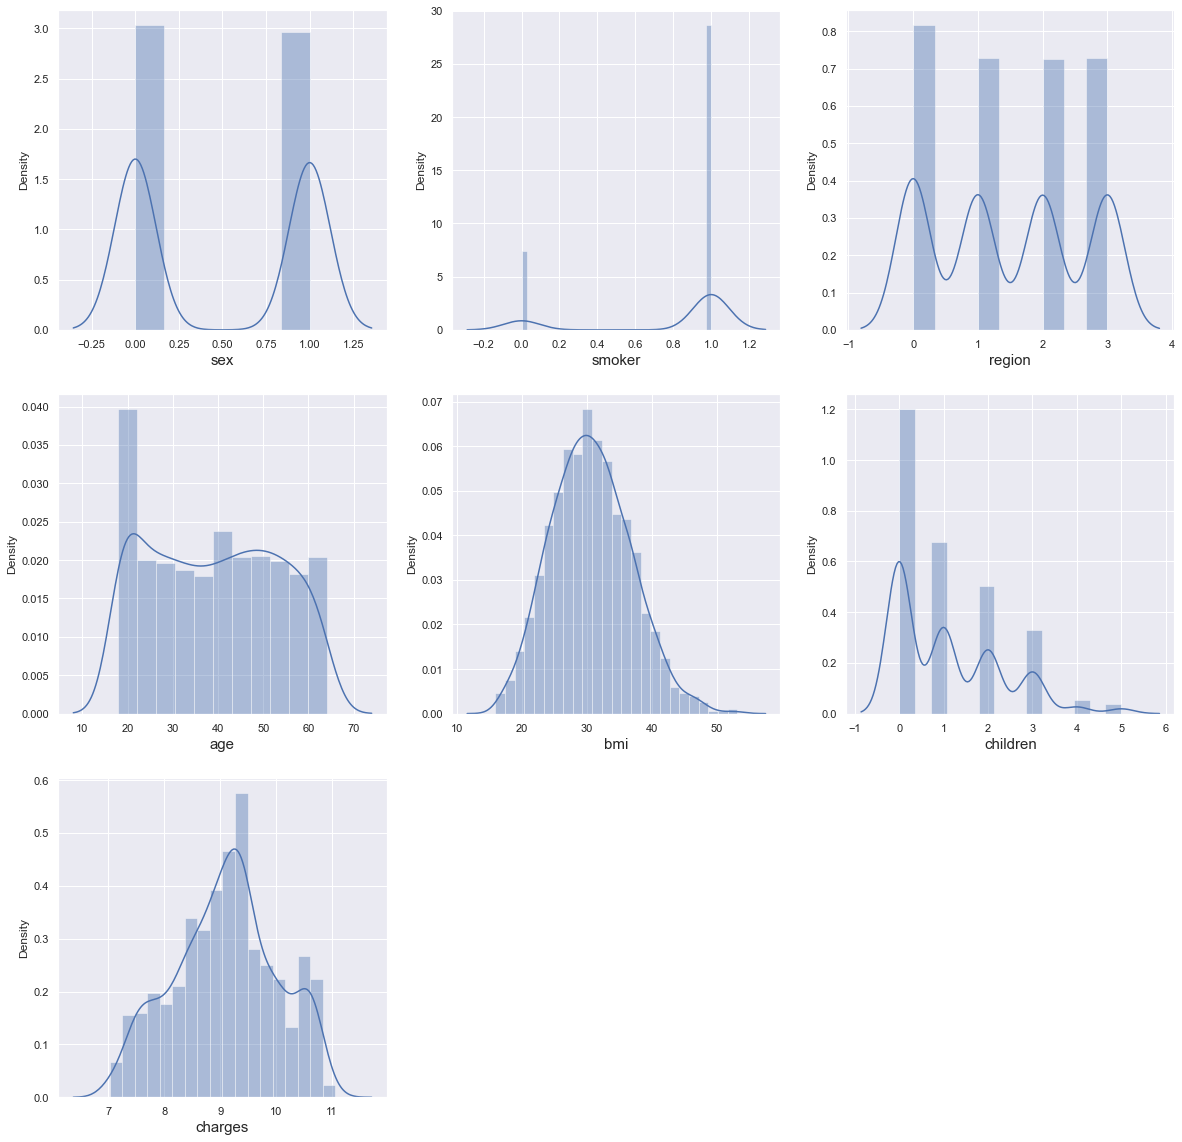

In [28]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

<AxesSubplot:>

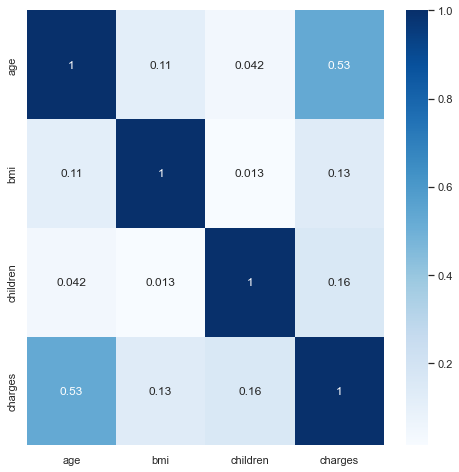

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(Numerical.corr(), cmap='Blues',annot=True)

#### Splitting the Features and Target

In [ ]:
Splitting the Features and Target

In [33]:
X = data.drop(columns = ["charges"],axis=1)
y = data["charges"]

In [34]:
X.head()

,sex,smoker,region,age,bmi,children
0,1,0,1,19,27.900,0
1,0,1,0,18,33.770,1
2,0,1,0,28,33.000,3
3,0,1,3,33,22.705,0
4,0,1,3,32,28.880,0


In [35]:
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

#### Feature Scaling

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_scaled

array([[ 1.0105187 , -1.97058663, -0.40328924, -1.43876426, -0.45332   ,
        -0.90861367],
       [-0.98959079,  0.5074631 , -1.28788104, -1.50996545,  0.5096211 ,
        -0.07876719],
       [-0.98959079,  0.5074631 , -1.28788104, -0.79795355,  0.38330685,
         1.58092576],
       ...,
       [ 1.0105187 ,  0.5074631 , -1.28788104, -1.50996545,  1.0148781 ,
        -0.90861367],
       [ 1.0105187 ,  0.5074631 , -0.40328924, -1.29636188, -0.79781341,
        -0.90861367],
       [ 1.0105187 , -1.97058663,  1.36589436,  1.55168573, -0.26138796,
        -0.90861367]])

#### Variance Inflation Factor

In [39]:
variables = X_scaled

In [40]:
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])] 

vif["Features"] = X.columns

In [41]:
vif

,VIF,Features
0,1.008879,sex
1,1.009411,smoker
2,1.078627,region
3,1.016233,age
4,1.090569,bmi
5,1.002749,children


#### Splitting the data for training and Testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1070, 6)
Shape of X Test:  (268, 6)
Shape of y Train:  (1070,)
Shape of y Test:  (268,)


In [46]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

Score : 0.761503194358298
r2 score: 0.7827252400205442
MAE: 0.276283733837943
MSE: 0.1918009149474045
RMSE: 0.43795081338822117


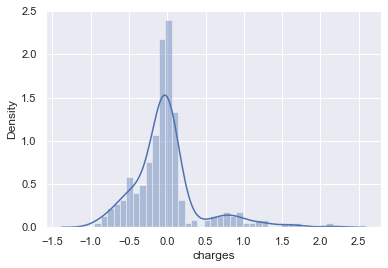

In [47]:
predict(LinearRegression())

Score : 0.9722075824151132
r2 score: 0.8395452477294985
MAE: 0.18628183870331141
MSE: 0.1416426293419966
RMSE: 0.37635439328111553


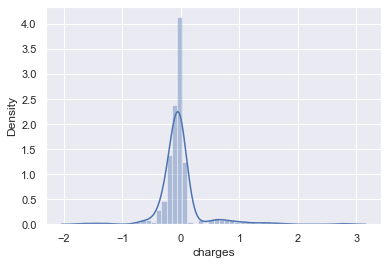

In [48]:
regression = predict(RandomForestRegressor())
regression

Score : 1.0
r2 score: 0.7119522884120227
MAE: 0.224554665914209
MSE: 0.25427626585022595
RMSE: 0.504258134143839


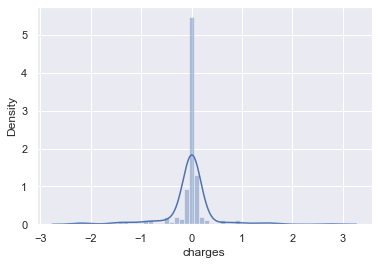

In [49]:
predict(DecisionTreeRegressor())

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

Score : 1.0
r2 score: 0.8079874235113342
MAE: 0.18097585583545092
MSE: 0.16950053404922344
RMSE: 0.411704425588581


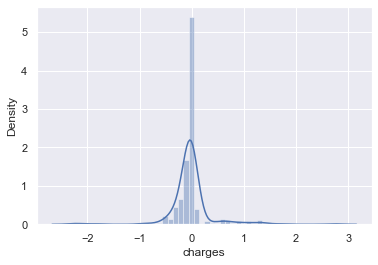

In [52]:
predict(ExtraTreesRegressor())

#### Save the Model

In [53]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

#### Conclusion
From the above all predicted models, the model Decision Tree Regressor and Extra Trees Regressor have more accuracy with the evaluation value than other models.